In [1]:


import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from env import user, password, host
import os

import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
# The following are functions contained in the accompanying acquire.py file

def get_db_url(database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

def get_store_data():
    '''
    Returns a dataframe of all store data in the tsa_item_demand database and saves a local copy as a csv file.
    '''
    query = '''
    SELECT *
    FROM items
    JOIN sales USING(item_id)
    JOIN stores USING(store_id) 
    '''
    
    df = pd.read_sql(query, get_db_url('tsa_item_demand'))
    
    df.to_csv('tsa_item_demand.csv', index=False)
    
    return df

def wrangle_store_data():
    filename = 'tsa_item_demand.csv'
    
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
    else:
        df = get_store_data()
        
    return df

In [6]:
df = wrangle_store_data()

    Add a 'month' and 'day of week' column to your dataframe.
    

In [10]:
df = prepare_store(df)

In [13]:
# grab day of week from the datetime index
df['day_of_week'] = df.index.day_name()

In [14]:
df.index.strftime('%B')

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'December', 'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December'],
      dtype='object', name='sale_date', length=913000)

In [ ]:
# month name from the string-format interpretation of datetime
df['month'] = df.index.strftime('%B')

In [11]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-03,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-04,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-05,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


    Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
    

In [16]:
df['sales_total'] = df.sale_amount * df.item_price

    Make sure all the work that you have done above is reproducible.

In [18]:
def prepare_store(df):
    # cut off the junk timestamp
    df.sale_date = df.sale_date.str.replace(' 00:00:00 GMT', '')
    # convert the sale date into pandas datetime
    df.sale_date = pd.to_datetime(df.sale_date)
    #set the index as the date time
    df = df.set_index('sale_date')
    # get sales total as revenue on the item+store+day basis
    df['sales_total'] = df.sale_amount * df.item_price
    # grab the month name 
    df.index.strftime('%B')
    # grab the day of week
    df['day_of_week'] = df.index.day_name()
    return df

OPSD data:

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [20]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

    Convert date column to datetime format.
    

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df.columns = [col.lower().replace('+','_plus_') for col in df.columns]

In [26]:
df.head()

,date,consumption,wind,solar,wind_plus_solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


    Set the index to be the datetime variable.
    

In [33]:
# set the datetime index
df = df.set_index('date')

In [34]:
# make sure the dates are sorted
df = df.sort_index()

    Plot the distribution of each of your variables.
    

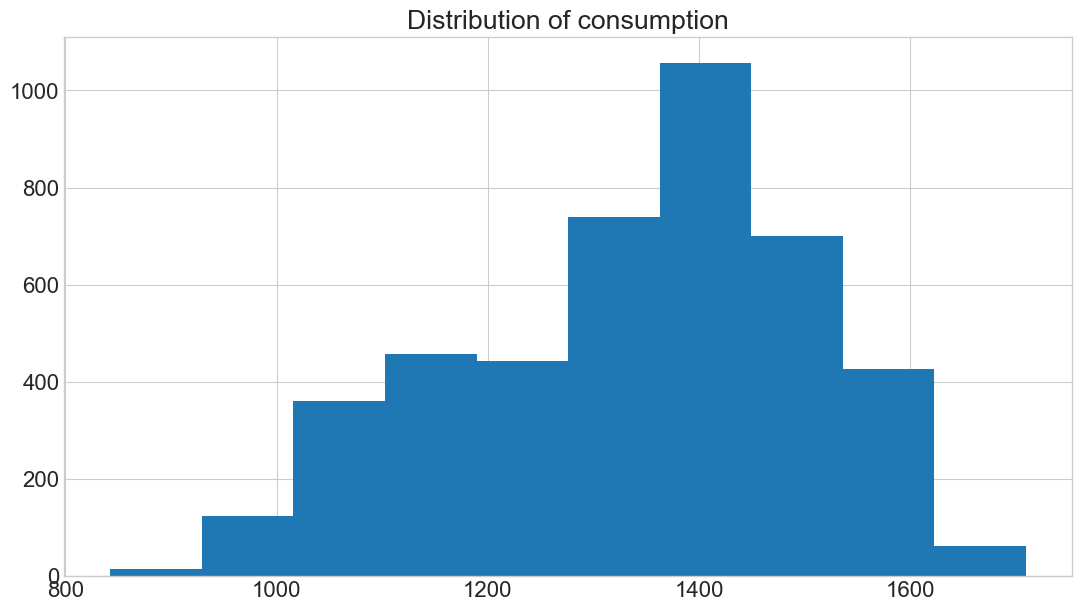

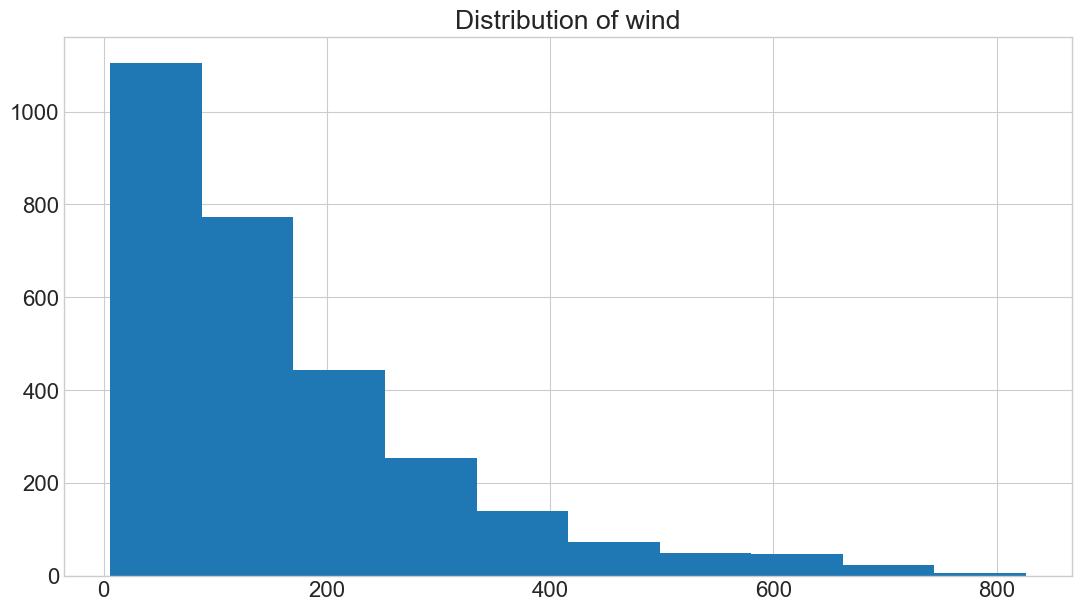

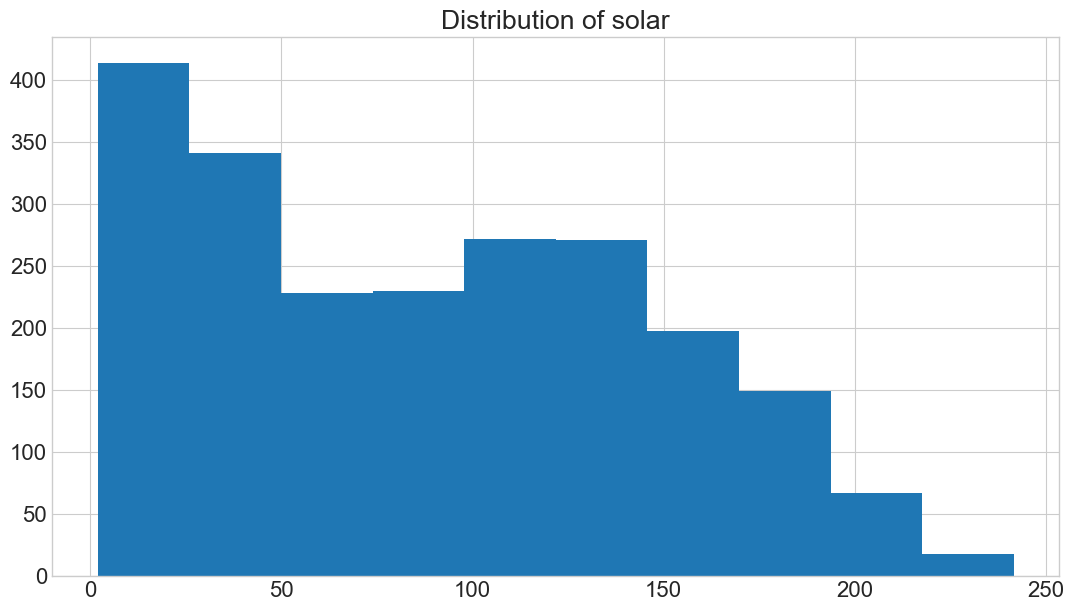

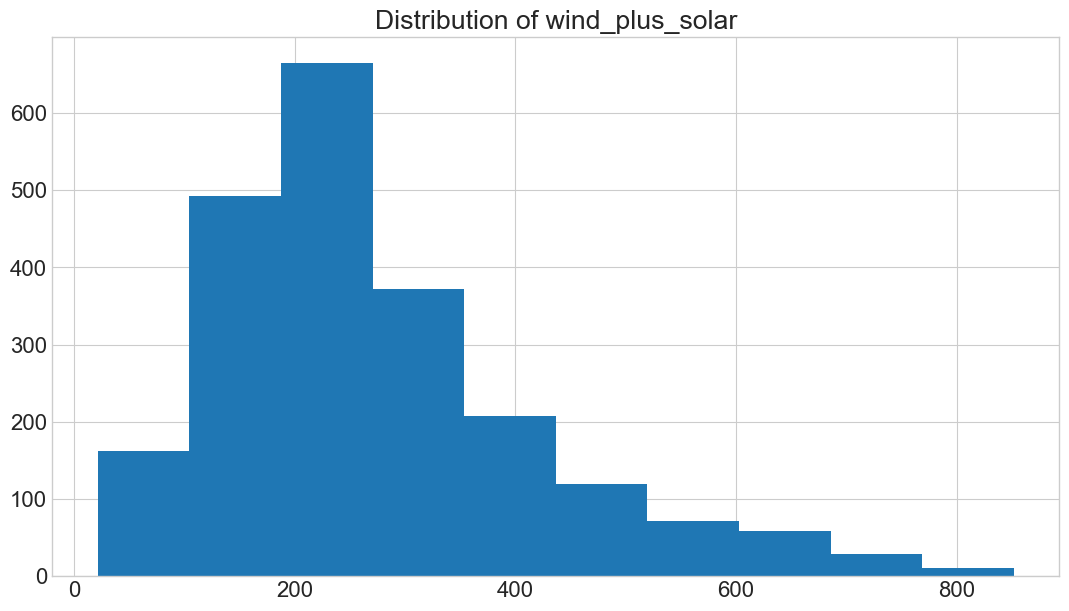

In [35]:
for col in df.columns:
    plt.hist(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

    Add a month and a year column to your dataframe.
    

In [36]:
df.index.year

Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='date', length=4383)

In [37]:
df.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='date', length=4383)

In [38]:
df['month'] = df.index.month
df['year'] = df.index.year

    Fill any missing values.
    

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   consumption      4383 non-null   float64
 1   wind             2920 non-null   float64
 2   solar            2188 non-null   float64
 3   wind_plus_solar  2187 non-null   float64
 4   month            4383 non-null   int32  
 5   year             4383 non-null   int32  
dtypes: float64(4), int32(2)
memory usage: 205.5 KB


In [40]:
df.groupby('year').sum()

,consumption,wind,solar,wind_plus_solar,month
year,,,,,
2006,489068.53600,0.000,0.000,0.000,2382
2007,496631.84700,0.000,0.000,0.000,2382
2008,495570.87600,0.000,0.000,0.000,2384
2009,459737.42800,0.000,0.000,0.000,2382
2010,488588.70000,35911.777,0.000,0.000,2382
2011,484814.08600,44032.951,0.000,0.000,2382
2012,469574.75400,45862.667,27887.332,73749.999,2384
2013,463336.85300,47197.832,29559.780,76697.443,2382
2014,504164.82100,51107.672,32498.307,83370.502,2382


Immediate takeaway:
It looks like wind rolled out energy production in 2010, and solar in 2012.  

Its reasonable that there are no values in these cells because we did not have any data for these up until these years



In [42]:
df = df.fillna(0)

In [43]:
df['wind_solar'] = df['wind'] + df['solar']

    Make sure all the work that you have done above is reproducible.
    That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [44]:
def prep_germany(df):
    '''
    Function will take in opsd energy data and return a cleaned dataframe with zeros appropriately filled
    datetime formatted,
    month and year columns added,
    and additive wind and solar column concatenated as wind_solar.
    return : a single pandas DataFrame
    '''
    # clean the column names
    df.columns = [col.lower().replace('+','_plus_') for col in df.columns]
    # setting date as a pandas datetime
    df['date'] = pd.to_datetime(df['date'])
    # setting the datetime as the index and sorting those values 
    df.set_index('date').sort_index()
    # month and year as new columns
    df['month'] = df.index.month
    df['year'] = df.index.year
    # fill empty cells with zero
    df = df.fillna(0)
    #compute an altered wind solar
    df['wind_solar'] = df['wind'] + df['solar']
    return df